## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ds_useful

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [4]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [6]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 25% of the data in the test set

In [35]:
# answer below:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

reviews = data.copy()

reviews.drop(['App', 'Category', 'Size', 'Installs', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

reviews.dropna(how='any', axis=0, inplace=True)

reviews['Price'] = reviews['Price'].str.replace('$', '').apply(pd.to_numeric, errors='coerce')
reviews['Reviews'] = reviews['Reviews'].str.replace('$', '').apply(pd.to_numeric, errors='coerce')
# reviews['Price'] = reviews['Price'].apply(lambda x: float(x.replace('$', '')))
# reviews['Reviews'] = reviews['Reviews'].apply(lambda x: int(x.replace('$', '')))

def score_to_numeric(x):
    if x=='Everyone':
        return 1
    if x=='Teen':
        return 2
    if x=='Everyone 10+':
        return 3
    if x=='Mature 17+':
        return 4
    if x=='Adults only 18+':
        return 5
    if x=='Unrated':
        return 6

reviews['Content Rating'] = reviews['Content Rating'].apply(score_to_numeric)

num_reviews = pd.get_dummies(reviews.select_dtypes('object'), drop_first=True)
# ds_useful.missingness_summary(num_reviews, print_log=True)
# for col in reviews.select_dtypes('number').columns:
#     num_reviews[col] = reviews[col]

join_dfs = [num_reviews, reviews.select_dtypes('number')]

num_reviews = pd.concat(join_dfs, axis=1)

Y = num_reviews['Rating']
X = num_reviews.drop('Rating', axis=1)

# X = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state = 1)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.15
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           1.66e-11
Time:                        14:53:59   Log-Likelihood:                -5200.7
No. Observations:                7024   AIC:                         1.041e+04
Df Residuals:                    7019   BIC:                         1.045e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1862      0.012    341.926      0.000       4.162       4.210
Type_Paid          0.1071      0.024      4.386      0.000       0.059       0.155
Reviews         1.236e-08   2.05e-09      6.033      0.000    8.34e-09    1.64e-08
Price             -0.0012      0.000     -2.602      0.009      -0.002      -0.000
Content Rating    -0.0025      0.008     -0.325      0.745      -0.018       0.013
==============================================================================
Omnibus:                     2835.187   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15039.488
Skew:                          -1.882   Prob(JB):                         0.00
Kurtosis:                       9.101   Cond. No.                     1.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check model assumptions of homoscedacity, normality of errors, and multicollinearity

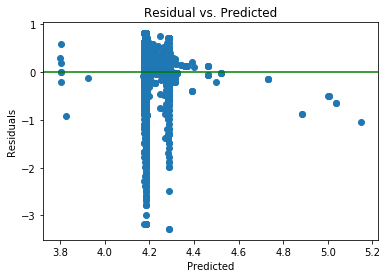

In [30]:
#answer below:

predictions = results.predict(X_train)
residuals = Y_train - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='g')
plt.title('Residual vs. Predicted')
plt.show()

In [33]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, residuals)
lev_stats = levene(predictions, residuals)

print('Bartlet statistics:', bart_stats)
print('Leven statistics:', lev_stats)
print()
print('Low p-vals, reject null, assume heteroscedastic')

Bartlet statistics: BartlettResult(statistic=24226.988148435095, pvalue=0.0)
Leven statistics: LeveneResult(statistic=4849.995269623351, pvalue=0.0)

Low p-vals, reject null, assume heteroscedastic


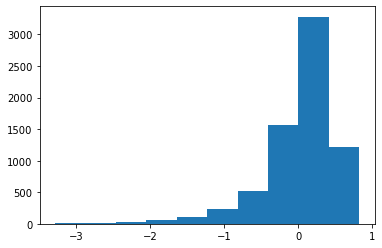

NormaltestResult(statistic=2835.1865753697098, pvalue=0.0)


In [38]:
plt.hist(residuals)
plt.show()

import scipy.stats as stats

print(stats.normaltest(residuals))

In [ ]:
# Correlation stuff

Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

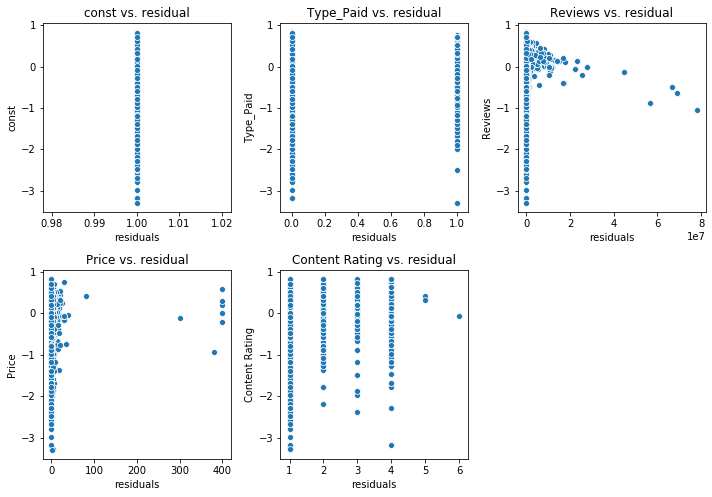

In [46]:
#answer below:
import seaborn as sns

plt.figure(figsize=(10,10))
for i, col in enumerate(X_train.columns, 1):
    plt.subplot(3,3,i)
    sns.scatterplot(X_train[col], residuals)
    plt.xlabel('residuals')
    plt.ylabel(col)
    plt.title(f'{col} vs. residual')
    plt.tight_layout()

plt.show()

In [48]:
# Remove the Reviews
new_model_df = num_reviews.copy()

new_model_df.drop('Reviews', axis=1, inplace=True)

In [51]:
# Re-model it
new_model_df = pd.concat(join_dfs, axis=1)

Y = num_reviews['Rating']
X = num_reviews.drop('Rating', axis=1)

# X = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state = 1)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.15
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           1.66e-11
Time:                        15:14:33   Log-Likelihood:                -5200.7
No. Observations:                7024   AIC:                         1.041e+04
Df Residuals:                    7019   BIC:                         1.045e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1862      0.012    341.926      0.000       4.162       4.210
Type_Paid          0.1071      0.024      4.386      0.000       0.059       0.155
Reviews         1.236e-08   2.05e-09      6.033      0.000    8.34e-09    1.64e-08
Price             -0.0012      0.000     -2.602      0.009      -0.002      -0.000
Content Rating    -0.0025      0.008     -0.325      0.745      -0.018       0.013
==============================================================================
Omnibus:                     2835.187   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15039.488
Skew:                          -1.882   Prob(JB):                         0.00
Kurtosis:                       9.101   Cond. No.                     1.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

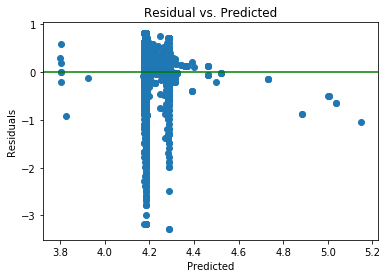

In [52]:
# Replot the residual vs protected

predictions = results.predict(X_train)
residuals = Y_train - predictions

plt.scatter(predictions, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='g')
plt.title('Residual vs. Predicted')
plt.show()

Plot the scatterplots between the independent variables you select and ratings. Do you think given this graph, these variables have good predictive power? 

In [0]:
# answer below:

